In [1]:
import gym
import gym_pygame

#!pip install git+https://github.com/ntasfi/PyGame-Learning-Environment.git
#!pip install git+https://github.com/qlan3/gym-games.git


#定义环境
class MyWrapper(gym.Wrapper):

    def __init__(self):
        env = gym.make('Pong-PLE-v0')
        super().__init__(env)
        self.env = env
        self.step_n = 0

    def reset(self):
        state = self.env.reset()
        self.step_n = 0
        return state

    def step(self, action):
        state, reward, done, info = self.env.step(action)
        self.step_n += 1
        if self.step_n >= 400:
            done = True
        return state, reward, done, info


env = MyWrapper()

env.reset()

couldn't import doomish
Couldn't import doom


/root/anaconda3/envs/pt39/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/root/anaconda3/envs/pt39/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/root/anaconda3/envs/pt39/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(


array([24.       ,  0.       , 24.       , 32.       , 24.       ,
       36.       ,  7.1824338])

In [2]:
#认识游戏环境
def test_env():
    print('env.observation_space=', env.observation_space)
    print('env.action_space=', env.action_space)

    state = env.reset()
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)

    print('state=', state)
    print('action=', action)
    print('next_state=', next_state)
    print('reward=', reward)
    print('done=', done)
    print('info=', info)


test_env()

env.observation_space= Box(-inf, inf, (7,), float32)
env.action_space= Discrete(3)
state= [ 24.           0.          24.          32.          24.
  36.         -10.07757721]
action= 0
next_state= [ 23.424       -0.576       23.04        33.2         23.66408076
  36.         -10.07757721]
reward= 0.0
done= False
info= {}


/root/anaconda3/envs/pt39/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:219: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/root/anaconda3/envs/pt39/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/root/anaconda3/envs/pt39/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


/root/anaconda3/envs/pt39/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(


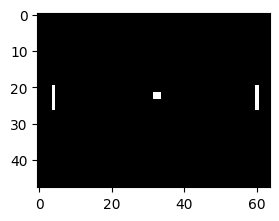

In [3]:
from matplotlib import pyplot as plt

%matplotlib inline


#打印游戏
def show():
    plt.figure(figsize=(3, 3))
    plt.imshow(env.render(mode='rgb_array'))
    plt.show()


show()

In [4]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

#初始化模型
model = PPO(
    policy='MlpPolicy',
    env=make_vec_env(MyWrapper, n_envs=8),  #使用N个环境同时训练
    learning_rate=1e-3,
    n_steps=1024,  #运行N步后执行更新,buffer_size=n_steps*环境数量
    batch_size=64,  #采样数据量
    n_epochs=16,  #每次采样后训练的次数
    gamma=0.99,
    verbose=0)

model

In [5]:
from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

/root/anaconda3/envs/pt39/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(-10.65, 3.7319565913874184)

In [6]:
# #训练
# model.learn(100_0000, progress_bar=True)

# #保存模型
# model.save('save/3.PPO.Pong')

In [7]:
#加载模型
model = PPO.load('save/3.PPO.Pong')

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

(-0.2, 0.4000000000000001)

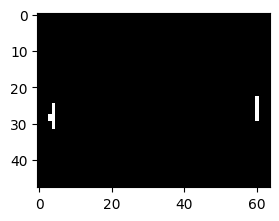

0.0 400 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [9]:
from IPython import display
import random


def test():
    state = env.reset()
    reward_sum = []
    over = False
    while not over:
        action, _ = model.predict(state)
        state, reward, over, _ = env.step(action)
        reward_sum.append(reward)

        if len(reward_sum) % 2 == 0:
            display.clear_output(wait=True)
            show()

    print(sum(reward_sum), len(reward_sum), reward_sum)


test()